<a href="https://colab.research.google.com/github/fridaruh/ML_and_IA_for_Finance/blob/master/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

La Universidad de Minho en Portugal se ha enterado que eres una crack para encontrar patrones que nadie más ve y han decidido llamarte para que les ayudes a saber qué está pasando con sus estudiantes últimamente.

Los estudiantes han empezado a tener malas calificaciones y la universidad quiere que los ayudes a encontrar qué podría estar afectando su desempeño.

### Sobre el set de datos

1) Ingresa a la página de UCI Machine Learning (link:http://archive.ics.uci.edu/ml/machine-learning-databases/00320/) que contiene el data set **Student Performance Data Set**  y da click en "student.zip" para descargar el archivo .zip que contiene el set de datos que vamos a trabajar.

2) Descomprime la carpeta "student.zip" dando click derecho y luego "Extraer aquí"

3) Una vez que se han extraído los datos copia el archivo llamado "student-mat.csv" a la carpeta de trabajo que utilizas normalmente para que lo tengas disponible en la misma ubicación que donde vas a trabajar este libro de Juputer Notebook

**Información de los atributos**

- **1 school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **2 sex** - student's sex (binary: 'F' - female or 'M' - male)
- **3 age** - student's age (numeric: from 15 to 22)
- **4 address** - student's home address type (binary: 'U' - urban or 'R' - rural)
- **5 famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **6 Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **7 Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- **8 Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- **9 Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **10 Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **11 reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **12 guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
- **13 traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **14 studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **15 failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
- **16 schoolsup** - extra educational support (binary: yes or no)
- **17 famsup** - family educational support (binary: yes or no)
- **18 paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **19 activities** - extra-curricular activities (binary: yes or no)
- **20 nursery** - attended nursery school (binary: yes or no)
- **21 higher** - wants to take higher education (binary: yes or no)
- **22 internet** - Internet access at home (binary: yes or no)
- **23 romantic** - with a romantic relationship (binary: yes or no)
- **24 famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **25 freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
- **26 goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
- **27 Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **28 Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **29 health** - current health status (numeric: from 1 - very bad to 5 - very good)
- **30 absences** - number of school absences (numeric: from 0 to 93)
- **31 G1** - first period grade (numeric: from 0 to 20)
- **31 G2** - second period grade (numeric: from 0 to 20)
- **32 G3** - final grade (numeric: from 0 to 20, output target)

Para más información consulta: http://archive.ics.uci.edu/ml/datasets/Student+Performance


# Business Case

De acuerdo a la información otorgada por la Universidad de Minho, crearemos un modelo de regresión lineal para encontrar los patrones que pueden afectar de manera positiva y negativa la calificación final de los alumnos.

Nuestro target será la variable G3, ubicada en la última columna.

# Desarrollo del modelo

Importa las siguientes librerías:
- pandas as pd
- numpy as np
- matplotlib.pyplot as plt
- seaborn as sns
- from sklearn.model_selection import train_test_split
- from sklearn import linear_model
- from sklearn import metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

- Carga el archivo "student-mat.csv" y asignalo a una variable llamada df.

Tip: Agrega un parámetro adicional al momento de utilizar la función de read_csv: sep=";"

Esto para que te regrese el dataframe separado por columnas.

In [2]:
df = pd.read_csv('/content/student-mat.csv', sep=';')

- Visualiza los primeros 5 registros para validar que se importó bien la información

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


- Obtén las estadísticas básicas del dataset

In [ ]:
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


- Grafica el histograma de la variable G3

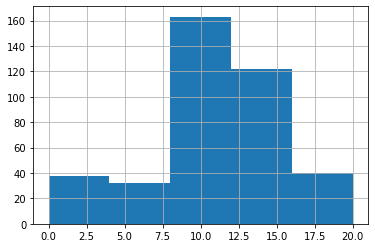

In [ ]:
df['G3'].hist(bins=5)

- Obtén nuevamente el histograma de 'G3' pero ahora haz 10 bins

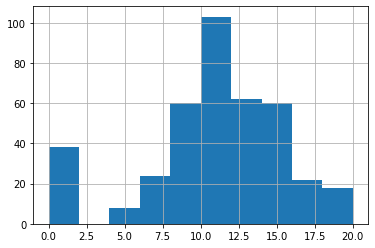

In [ ]:
df['G3'].hist(bins=10)

- Genera una gráfica boxplot donde tengas en x='sex', en y='G3' para ver la dsitribución de las calificaciones finales por sexo

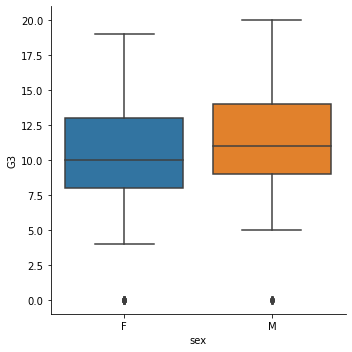

In [ ]:
sns.catplot(x='sex', y='G3', kind='box', data=df)

- Grafica un mapa de calor para ver todas las correlaciones que hay entre las variables.

Tip: Utiliza las dimensiones (12,10) para poder visualizar los valores de la correlación

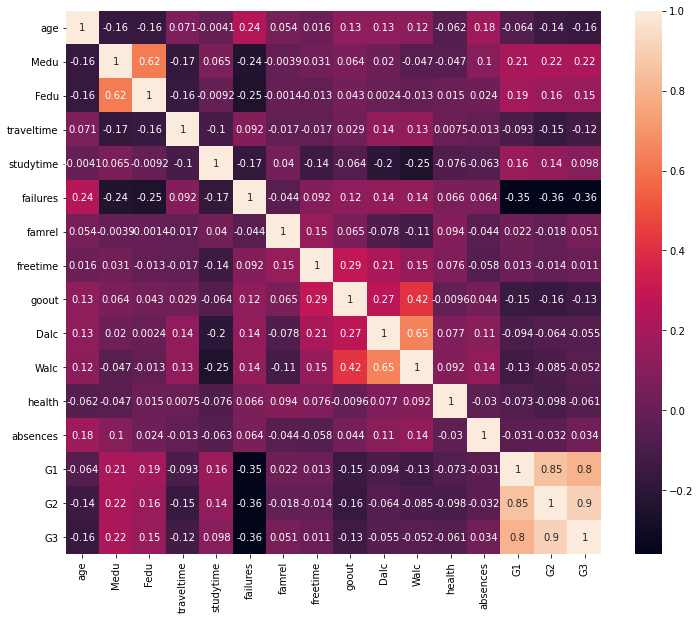

In [ ]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Entrenamiento

- Crea una variable llamada Y la cual tenga la columna G3 del dataset df

In [ ]:
Y = df['G3']

- Crea una variable X la cual contenga las siguientes columnas:
    [ 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences']

In [ ]:
X = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health', 'absences']]

### Train, test, split

- Genera x_train, x_test,y_train,y_test utilizando la función train_test_split y asignale un test_size del 25% y un random_state= 77

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.25, random_state=77)

- Imprime el tamaño de x_train y de x_test para validar que la partición fue del 25% en train y 75% en test

In [ ]:
print(x_test.shape)
print(len(df)*.25)

(99, 13)
98.75


In [ ]:
print(x_train.shape)
print(len(df)*.75)

(296, 13)
296.25


- Asigna a una variable llamada **lm** el valor de linear_model.LinearRegression() para almacenar los parámetros del modelo lineal que vamos a utilizar

In [ ]:
lm = linear_model.LinearRegression()

- Genera una variable llamada **model** donde almacenes el entrenamiento del modelo. Utiliza x_train y y_train para entrenar el modelo

In [ ]:
model = lm.fit(x_train, y_train)

- Utilizando x_test, genera las predicciones utilizando el modelo que acabas de entrenar y almacena los valores  en una variable llamada **predictions**

In [ ]:
y_pred = lm.predict(x_test)

- Utiliza la librería de seaborn (sns) para generar visualización que contraste las predicciones que generó tu modelo contra y_test que eran los valores reales

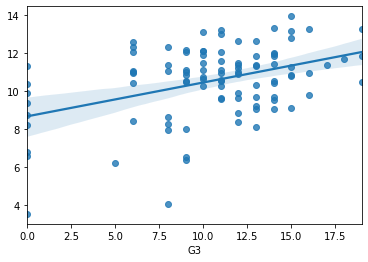

In [ ]:
sns.regplot(y_test,y_pred )

- Obtén el score del modelo que almacenaste en **model**. Recuerda que debes utilizar x_test, y_test como parámetros

In [ ]:
model.score(x_test,y_test)

0.17620712923639703

- Obtén los coeficientes del modelo para cada una de las variables de X y almacénalos en una variable llamada **coef_parameter**

In [ ]:
coef_parameter = pd.DataFrame(model.coef_, X.columns, columns=['Coef'])

- Imprime coef_parameter

In [ ]:
coef_parameter.sort_values(by='Coef')

,Coef
failures,-1.734771
goout,-0.635033
age,-0.346666
Dalc,-0.273391
health,-0.123083
traveltime,-0.108075
Fedu,0.010922
absences,0.034105
studytime,0.047127
Walc,0.271011


- Obtén el valor en el que se intersecta la recta con el eje

In [ ]:
lm.intercept_

14.452688415277564

- Genera una variable donde almacenes los valores de la predicción de tu modelo sobre X y llámala **predict_dataset** y luego crea una variable en el dataset 'df' llamada **predicted** la cual contenga los valores que almacenaste en predict_dataset.

Nota: Debe de ser sobre X porque el dataset original 'df' tiene columnas categóricas que el modelo no puede recibir como variables predictoras.

In [ ]:
predicted = lm.predict(X)

In [ ]:
df['predicted'] = predicted

- Por último, Obtén la métrica de R² del modelo (R² es un "número que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes". Básicamente, qué tan preciso es nuestro modelo)

In [ ]:
metrics.r2_score(y_test, y_pred)

0.17620712923639703